In [1]:
import numpy as np
from hmmlearn import hmm

In [33]:
from vdata import Folio, Voynich

In [17]:
# the document
text = "The quick brown fox jumped over the lazy dog".lower().split()

def tokenize(text):
    """
    text is an array of stuff
    """
    tokens = set(text)
    token2int = {t:i for i,t in enumerate(tokens)}
    int2token = {i:t for t,i in token2int.items()}
    text = [token2int[t] for t in text]
    
    return text, token2int, int2token

text, word_index, index_word = tokenize(text)
word_index

{'brown': 7,
 'dog': 1,
 'fox': 0,
 'jumped': 4,
 'lazy': 2,
 'over': 5,
 'quick': 3,
 'the': 6}

In [39]:
a = Folio('f66v')
text = a.text

text, word_index, index_word = tokenize(text)
X = np.array(text).reshape(-1,1)

remodel = hmm.MultinomialHMM(n_components=2, n_iter=200)
remodel.fit(X)
predictions = remodel.predict(X)

def getGroups(predictions, n):
    p = set(X[predictions == n].flatten())
    p = [index_word[i] for i in p]
    print(' '.join(p))

getGroups(predictions, 0)
getGroups(predictions, 1)

o c a e y n s
h o k m g t   e f d i r l q s p


In [40]:
a = Voynich()
lines = list(a.data[a.data.words > 4].text)

text = ' '.join(lines)
text, word_index, index_word = tokenize(text)
X = np.array(text).reshape(-1,1)
print(X.shape)

remodel = hmm.MultinomialHMM(n_components=2, n_iter=200)
remodel.fit(X)
predictions = remodel.predict(X)
print('done!')

3721 lines
e f d s p h x c g r q o k z t   y l
v a f d s p x g i r o m k z t   n l


In [65]:
import pandas as pd

probabilities = pd.DataFrame({'X':X.flatten(), 'predictions':predictions}).groupby('X').agg(np.mean).sort_values(by='predictions')
probabilities['letter'] = [index_word[x] for x in probabilities.index]
probabilities

,predictions,letter
X,,
20,0.000000,y
2,0.000000,e
7,0.000000,h
9,0.000000,c
13,0.000000,q
5,0.053521,s
3,0.065463,f
6,0.075423,p
16,0.075531,k


In [77]:
a = Voynich()
lines = list(a.data[a.data.words > 4].text)

text = ' '.join(lines).split() # now for the words
text, word_index, index_word = tokenize(text)
X = np.array(text).reshape(-1,1)
print(X.shape)

(34991, 1)


In [78]:
remodel = hmm.MultinomialHMM(n_components=2, n_iter=200)
remodel.fit(X)
predictions = remodel.predict(X)
print('done!')

/home/cz/anaconda3/lib/python3.6/site-packages/hmmlearn/hmm.py:405: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/home/cz/anaconda3/lib/python3.6/site-packages/hmmlearn/base.py:459: RuntimeWarning: divide by zero encountered in log
  np.log(self.startprob_),
/home/cz/anaconda3/lib/python3.6/site-packages/hmmlearn/base.py:468: RuntimeWarning: divide by zero encountered in log
  np.log(self.startprob_),


done!


/home/cz/anaconda3/lib/python3.6/site-packages/hmmlearn/base.py:451: RuntimeWarning: divide by zero encountered in log
  n_samples, n_components, np.log(self.startprob_),


In [85]:
probabilities = pd.DataFrame({'X':X.flatten(), 'predictions':predictions}).groupby('X').agg(np.mean).sort_values(by='predictions')
probabilities['word'] = [index_word[x] for x in probabilities.index]
probabilities

,predictions,word
X,,
0,0.0,cheetam
2976,0.0,keechey
2978,0.0,okaifhhy
5974,0.0,opcheeky
2981,0.0,daikhyky
2982,0.0,shckhhy
5972,0.0,diy
5971,0.0,alog
2988,0.0,larorol


In [88]:
remodel.transmat_

array([[0.96435589, 0.03564411],
       [0.0532707 , 0.9467293 ]])

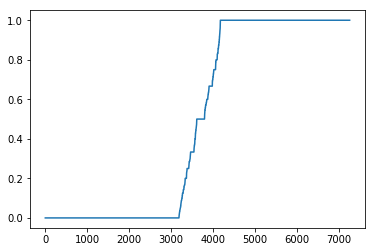

In [90]:
probabilities.index = pd.RangeIndex(len(probabilities.index))
probabilities.predictions.plot()

In [111]:
# all the words in state A
A_words = ' '.join(probabilities[probabilities.predictions == 0.0].word)
B_words = ' '.join(probabilities[probabilities.predictions == 1.0].word)
with open('A_words.txt', 'w') as f:
    f.write(A_words)
with open('B_words.txt', 'w') as f:
    f.write(A_words) 
    
print(A_words[:200])
print(B_words[:200])

cheetam keechey okaifhhy opcheeky daikhyky shckhhy diy alog larorol alekeey ya qopshedy qy shoefy shekchy olfcham ochedy keeshy okirolcy tohedy qokedydy dgs otedyl poaral chekeo otedeey shckhor aindar
cheem kchorl ypcheddy saldaiin chckaiin chofaly okshol cthchy chalaiin cheis oshol shcheaiin otos rpchey choross dchokchy cheoe ychoees dykeor oteodchy otcheoly ytaipom qokeoly chkeeey yteair cheeokee


What does this mean?
* if you're in state A, you're likely to see these words a lot
* you're also 5% going to switch to state B... and see the other words